# 📘 Personalized Healthcare Recommendation System  
Using Blood Donation Dataset (ML-based Health Insights)  

---

### **Project Title**  
Personalized Healthcare Recommendation using Machine Learning  

---

### **Tools**  
Google Colab, Jupyter Notebook, Python, Flask, Scikit-learn, XGBoost, Imbalanced-learn, Matplotlib, Seaborn  

---

### **Technologies**  
- Machine Learning Classification  
- Data Preprocessing & Scaling  
- Class Imbalance Handling (SMOTE)  
- Feature Importance Analysis  
- Web Application Deployment with Flask  

---

### **Domain**  
Healthcare Analytics, Preventive Medicine, HealthTech  

---

### **Difficulty Level**  
Beginner to Intermediate  

---

### **Project Overview**  
This project predicts patient health conditions based on historical blood donation data and recommends personalized health actions. The dataset includes donor history features such as **Recency**, **Frequency**, **Monetary**, and **Time** metrics.  

**Objectives:**  
- Predict whether a person is likely to donate blood again or needs attention  
- Provide personalized health recommendations  
- Deploy an easy-to-use Flask web application for real-time prediction  

This solution helps **hospitals**, **blood banks**, and **healthcare providers** understand donor behavior and improve engagement strategies.  

---

### **Data Science Applications**  
- Predictive Analytics – Identify individuals likely to donate again  
- Risk Assessment – Classify patients into health categories  
- Decision Support – Aid in healthcare planning and blood supply management  

---

### **Column Descriptors**  
| Column Name | Description |
|-------------|-------------|
| Recency     | Days since last donation |
| Frequency   | Total number of donations |
| Monetary    | Total blood volume donated |
| Time        | Months since first donation |
| target      | 1 = Donated recently, 0 = Did not donate |

---

### **Ethical Considerations**  
- No personal identifiers in the dataset  
- Predictions should not replace medical advice  
- Model to be used as a supportive tool only  


In [ ]:
# Basic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/blood.csv')
df.head(10)

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [ ]:
# Rename target column if unnamed
if df.columns[-1] not in ['target', 'label', 'outcome']:
    df.columns = df.columns[:-1].tolist() + ['target']

df.head()

,Recency,Frequency,Monetary,Time,target
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
# Shape
print("Shape:", df.shape)
df.info()

Shape: (748, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   target     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
# Summary
df.describe()

,Recency,Frequency,Monetary,Time,target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


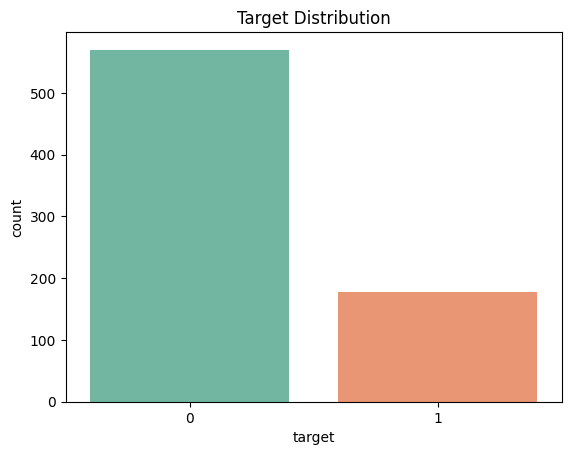

In [ ]:
# Target distribution
sns.countplot(data=df, x='target', palette='Set2')
plt.title("Target Distribution")
plt.show()

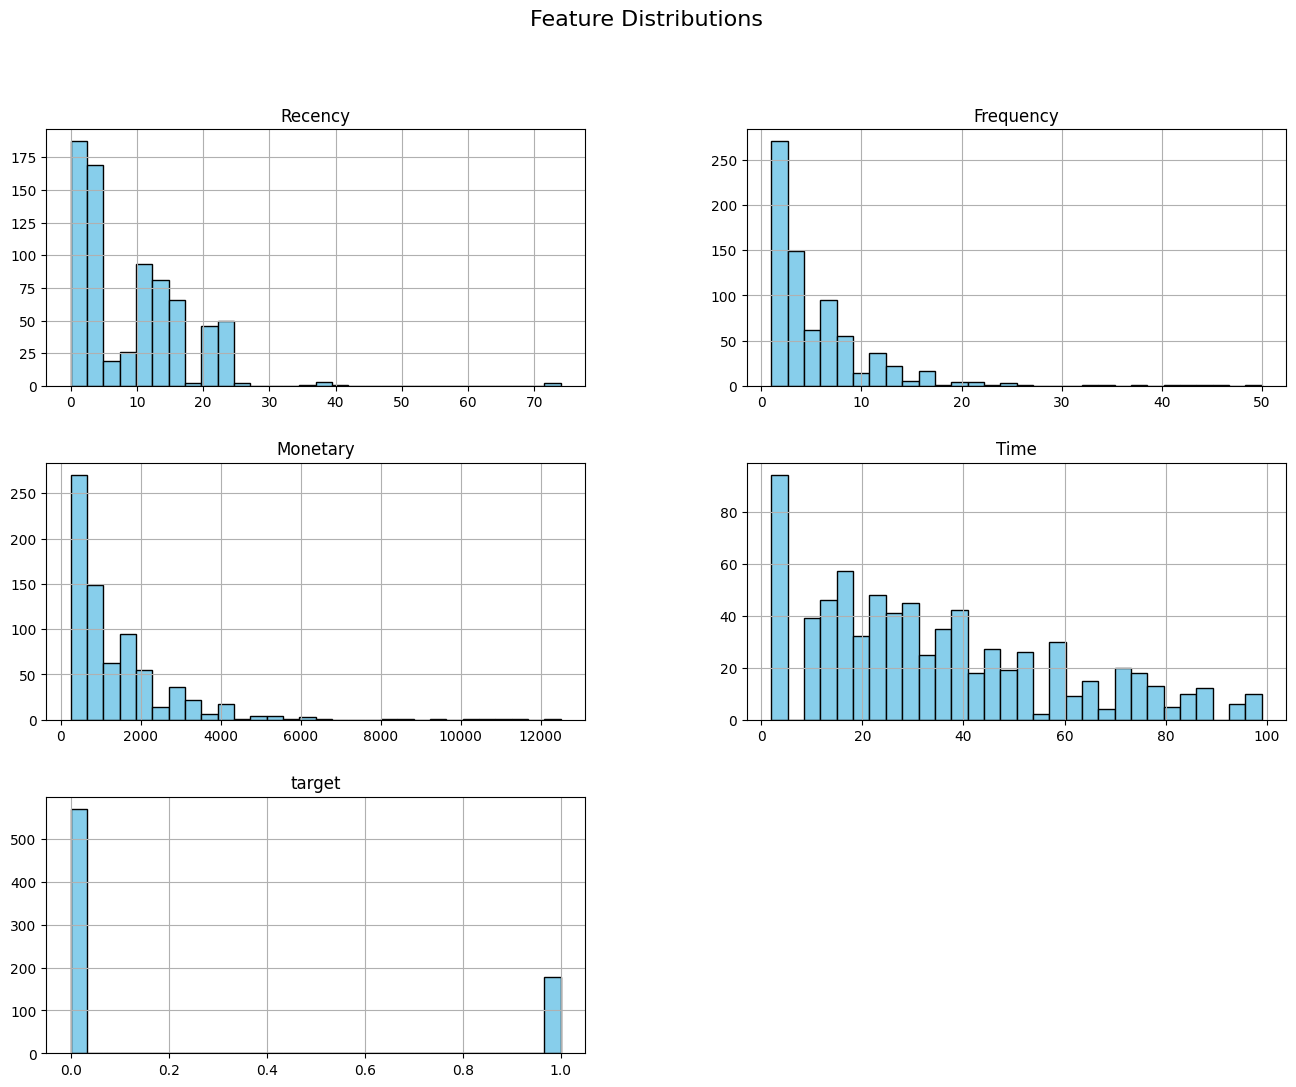

In [ ]:
# Histograms
df.hist(bins=30, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

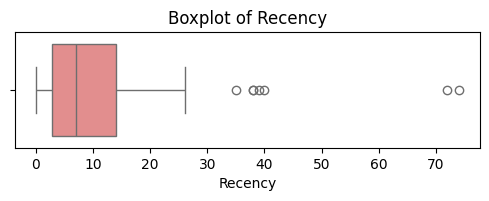

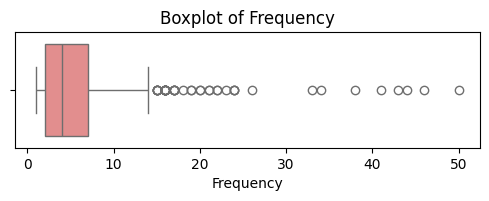

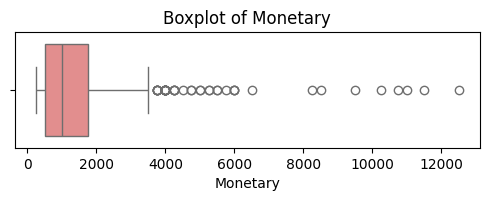

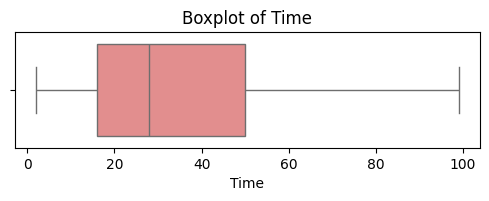

In [ ]:
# Boxplots
for col in df.drop('target', axis=1).columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()

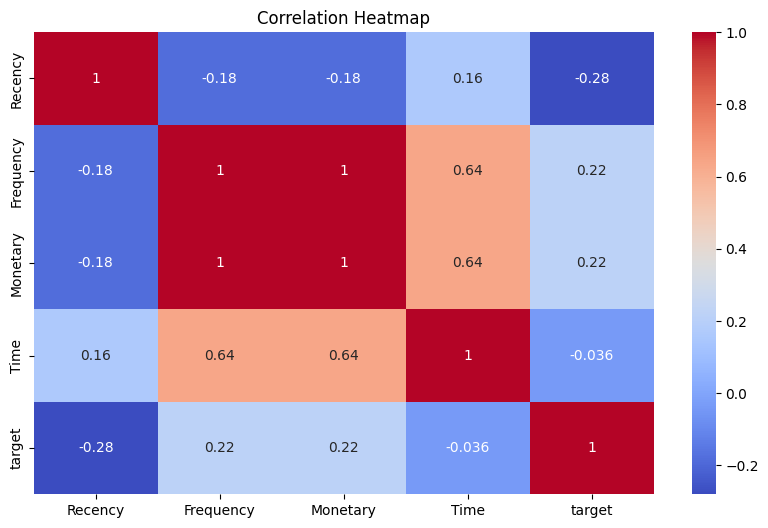

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Split features & labels
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n Model: {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
evaluate_model("Logistic Regression", lr_model)


 Model: Logistic Regression
Accuracy : 0.7666666666666667
Precision: 0.727072927072927
Recall   : 0.7666666666666667
F1 Score : 0.7011492172654059


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model("Random Forest", rf_model)


 Model: Random Forest
Accuracy : 0.74
Precision: 0.7231233969791963
Recall   : 0.74
F1 Score : 0.729872340425532


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
evaluate_model("XGBoost", xgb_model)


 Model: XGBoost
Accuracy : 0.76
Precision: 0.7511864406779661
Recall   : 0.76
F1 Score : 0.7550101419878296


In [ ]:
svm_model = SVC(kernel='rbf', probability=True)
evaluate_model("Support Vector Machine", svm_model)


 Model: Support Vector Machine
Accuracy : 0.7733333333333333
Precision: 0.7511111111111112
Recall   : 0.7733333333333333
F1 Score : 0.7055592469545958


In [ ]:
voting_model = VotingClassifier(estimators=[
    ('lr', lr_model), ('rf', rf_model), ('xgb', xgb_model)
], voting='hard')
evaluate_model("Voting Ensemble", voting_model)


 Model: Voting Ensemble
Accuracy : 0.76
Precision: 0.7429508196721312
Recall   : 0.76
F1 Score : 0.7490677966101695


In [ ]:
def plot_roc_binary_or_multiclass(model, X_test, y_test, title):
    from sklearn.preprocessing import label_binarize
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, auc
    import numpy as np

    # Binary or multiclass check
    classes = np.unique(y_test)

    if len(classes) == 2:
        # Binary classification
        y_score = model.predict_proba(X_test)[:, 1]  # probability for class 1
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {title}")
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

    else:
        # Multiclass classification
        y_test_bin = label_binarize(y_test, classes=classes)
        clf = OneVsRestClassifier(model)
        clf.fit(X_train, y_train)
        y_score = clf.predict_proba(X_test)

        plt.figure(figsize=(8, 6))
        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {title}")
        plt.legend()
        plt.grid(True)
        plt.show()


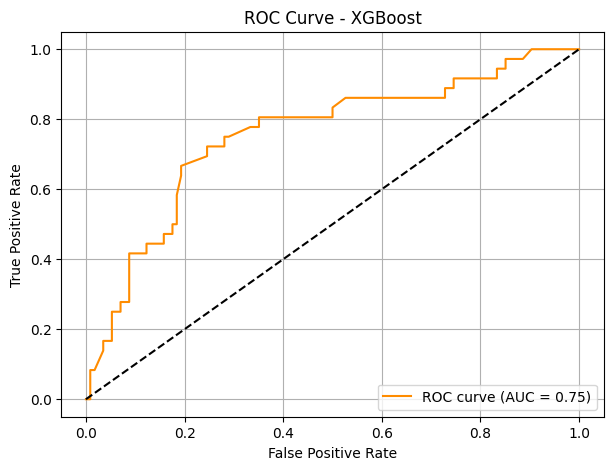

In [ ]:
plot_roc_binary_or_multiclass(xgb_model, X_test, y_test, "XGBoost")

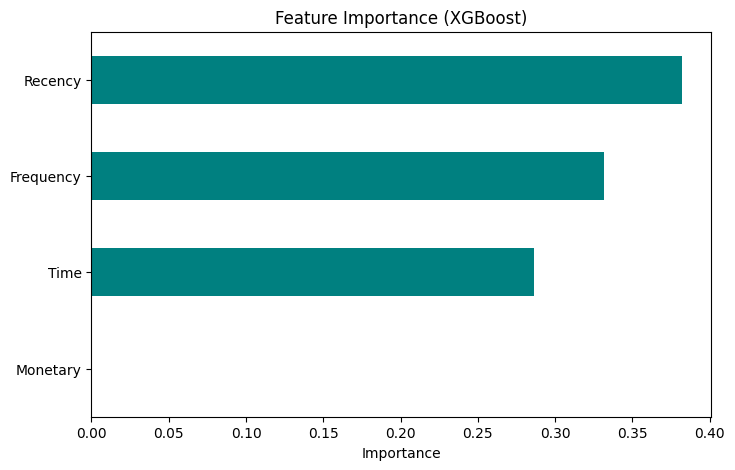

In [ ]:
importances = xgb_model.feature_importances_
feat_names = X.columns

importance_df = pd.Series(importances, index=feat_names)
importance_df.sort_values().plot(kind='barh', figsize=(8, 5), color='teal')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.show()

In [ ]:
def generate_recommendation(patient_data):
    pred = xgb_model.predict(scaler.transform(patient_data))
    recommendation_map = {
        0: " Healthy – No action needed",
        1: " Schedule regular checkups",
        2: " Adopt lifestyle changes (diet/exercise)",
        3: " Medication advised"
    }
    return recommendation_map.get(pred[0], " Unknown status")

for i in [5, 10, 20, 30]:
    sample = pd.DataFrame([X.iloc[i]])
    print(f"Patient {i}: {generate_recommendation(sample)}")

Patient 5:  Schedule regular checkups
Patient 10:  Healthy – No action needed
Patient 20:  Schedule regular checkups
Patient 30:  Healthy – No action needed


In [ ]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
